# Linear Regression (Practice Project)

## Imports


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Getting the dataset

We'll work with the *Ecommerce Customers.csv* file from the seller. It consists of customer information such as Email, Address, and their color Avatar. It also has numerical value columns as shown below.

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

**The dataset is assigned to a Dataframe named "customers"**

In [5]:
customers = pd.read_csv('customers.csv')

**Checking the head of customers, and checking its describe() and info() methods.**

In [6]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

For the rest of the exercise we'll only be using the numerical data of the dataframe.
___
**Importing Seaborn**

In [9]:
import seaborn as sns
import scipy.stats as stats
sns.set_style('whitegrid')

**Checking the relationship between 'Time on Website' and 'Yearly Amount Spent'**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


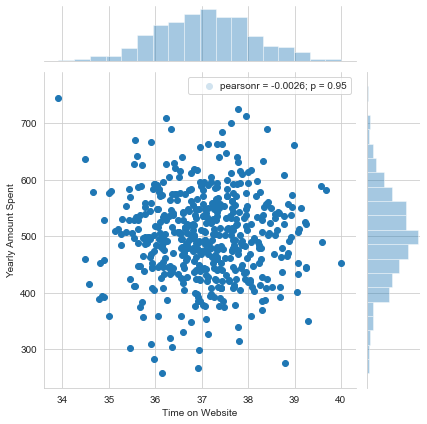

In [10]:
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent',data = customers).annotate(stats.pearsonr)

**Checking the relationship between 'Time on App' and 'Yearly Amount Spent'**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


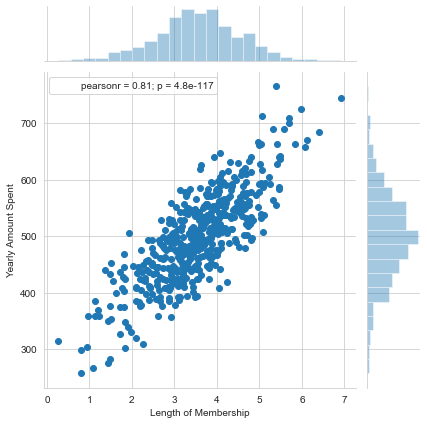

In [11]:
sns.jointplot(x = 'Length of Membership', y = 'Yearly Amount Spent',data = customers).annotate(stats.pearsonr)

**Exploring the types of relationships across the entire dataset using 'pairplot' function.**

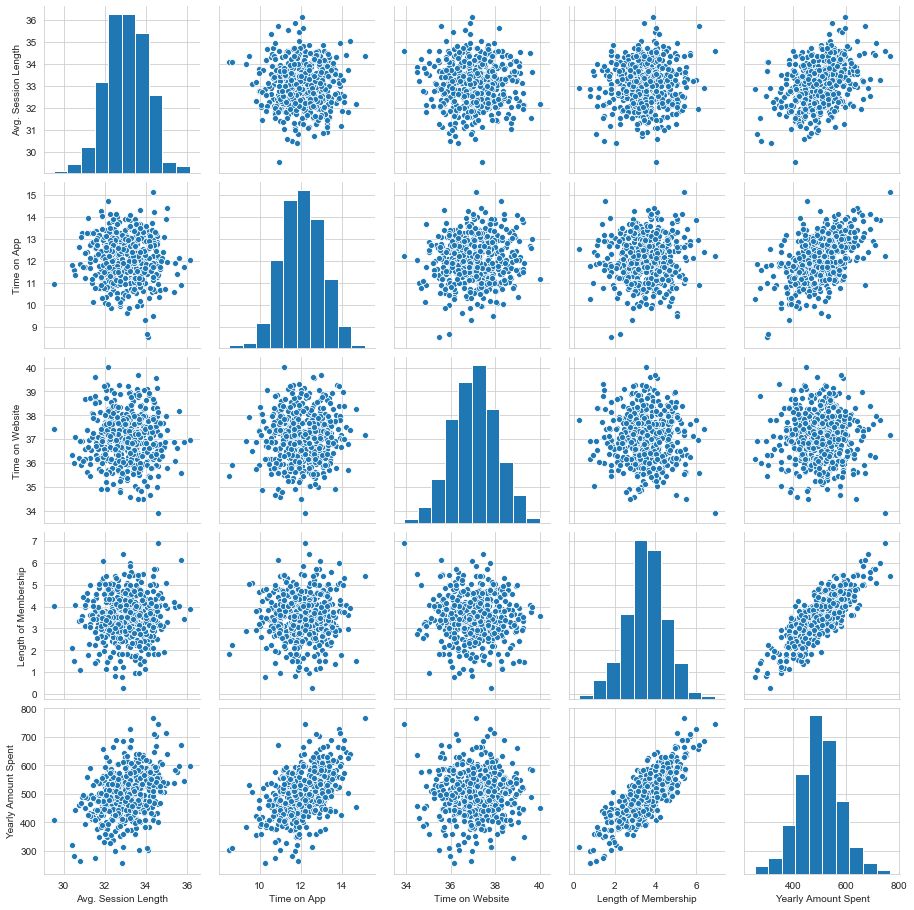

In [12]:
sns.pairplot(customers)

**Based on the results, 'Yearly Amount Spent' is mostly correlated with 'Length of Membership'.**

**Creating a linear model using Seaborn lmplot between 'Yearly Amount Spent' and 'Length of Membership.'**

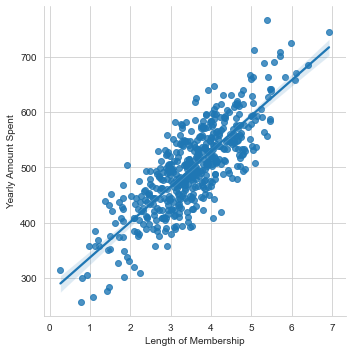

In [67]:
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = customers)

## Training and Testing Data

Variable X represents the numerical features of the customers and variable y represents the 'Yearly Amount Spent' column.

In [13]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [14]:
y = customers['Yearly Amount Spent']

**Using model_selection.train_test_split from sklearn to split the data into training and testing sets. The test_size was set to 0.3 and random_state was set to 101**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training the Model

**Importing LinearRegression from sklearn.linear_model**

In [17]:
from sklearn.linear_model import LinearRegression

**Creating an instance of a LinearRegression() model named lm.**

In [18]:
lm = LinearRegression()

**Training lm on the training data.**

In [19]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Printing the coefficients of the model**

In [20]:
print('Coefficients: {0}'.format(lm.coef_))

Coefficients: [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data

**Using lm.predict() to predict the X_test set of the data and evaluate the performance of our model**

In [21]:
predictions = lm.predict(X_test)

**Creating a scatterplot between the real test values and the predicted values.**

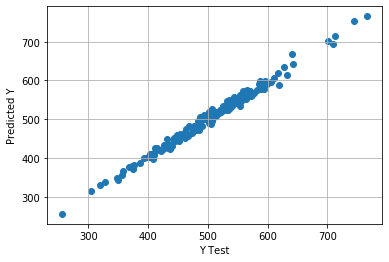

In [52]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid(True)

## Evaluating the Model

**Evaluating the model performance by calculating the Mean Absolute Error, Mean Squared Error and Root Mean Squared Error**

In [22]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, predictions))

Mean Absolute Error:  7.228148653430853


In [23]:
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, predictions))

Mean Squared Error:  79.81305165097487


In [24]:
print('Root Mean Absolute Error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root Mean Absolute Error:  8.933815066978656


## Conclusion

**Creating a dataframe to evaluate and interpret the values of coefficients of the regression model.**

In [25]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficient'])
cdf

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


***Interpretation***

* If all the features except Avg. Session Length, are kept as fixed values, an increase of a single unit in Avg. Session Length will result in an increase of $25.98 of Yearly Amount Spent for a customer. Similarly, if all other three numerical features are considered case-by-case, each feature will have their respective effects towards the Yearly Amount Spent. 
* The least effective feature in this list is the "Time on Website" as evident by its very low coefficient value. 
* The feature with the highest impact towards the "Yearly Amount Spent" is the "Length of Membership" according to its high coefficient value.

**Question:** ***Do you think the company should focus more on their mobile app or on their website?***

The company already performs relatively well on its mobile app, compared to the website. Therefore, it might be a good idea to focus more on improving the website in order to increase the sales coming through the website and thereby, reduce the bounce rate. On the other hand, rewarding the customers based on their length of membership, can potentially further strengthen the sales because older customers might be tempted to buy more if they are rewarded with additional benefits.